# DOMAIN: TRANSPORTATION

## AIRLINE FARE PREDICTION

This includes Data Collection, Pre Processing, EDA, Modelling, and Fine Tuning.

## DATA COLLECTION

We did a thourough research for the data related to our domain. First we finalised the mode of transportation and choose Airline Transport. We collected the data from kaggle. https://www.kaggle.com/datasets/zwartfreak/airline-fare-prediction
It had 2 data, train and test. We chose the train test .

## PRE PROCESSING

In [1]:
# import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_excel('train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3898
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7663
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13883
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6219
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13303


In [3]:
df.shape

(10683, 11)

In [4]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional Info    object
Price               int64
dtype: object

### 1. MISSING VALUE HANDLING

In [5]:
#check for missing values
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional Info    0
Price              0
dtype: int64

In [6]:
df['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [7]:
df[df['Route'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7481


In [8]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

The missing value is unable to fill using available data.So we will drop this record.

In [9]:
df = df.dropna()
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional Info    0
Price              0
dtype: int64

### 2. OUTLIER DETECTION AND HANDLING

<AxesSubplot:>

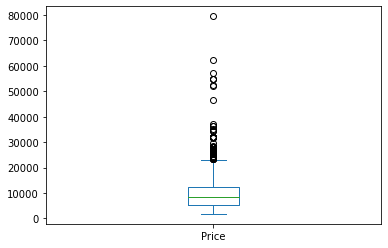

In [10]:
df.plot(kind ='box')

Price is our target variable. Airline has many sub categories and all are not equal players. Some are premium, some falls in mid range, some in low cost.So we will create a new range column.First lets understand how price varies with different Airlines and add the range column.

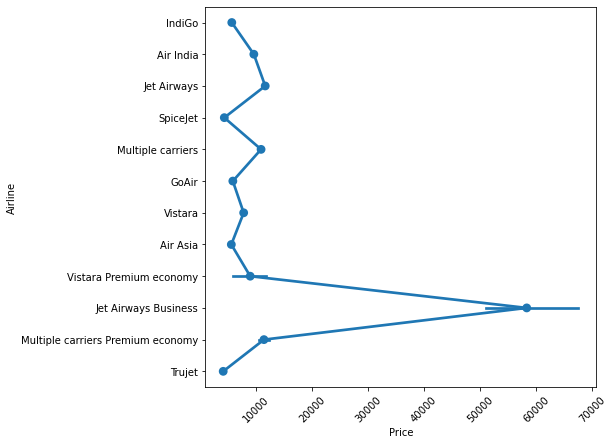

In [11]:
plt.figure(figsize =(7,7))
sns.pointplot(data =df, x = 'Price', y = 'Airline')
plt.xticks(rotation = 45)
plt.show()

In [12]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [13]:
low = ['IndiGo','SpiceJet','GoAir','Air Asia','Trujet']
medium = ['Air India','Jet Airways','Multiple carriers', 'Vistara','Vistara Premium economy',
          'Multiple carriers Premium economy']
high = ['Jet Airways Business']


df['Airline range'] = df['Airline']# initiallise a new column
df.loc[df['Airline'].isin(low),'Airline range'] = 'low'
df.loc[df['Airline'].isin(medium),'Airline range'] = 'medium'
df.loc[df['Airline'].isin(high),'Airline range'] = 'high'
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price,Airline range
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3898,low
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7663,medium
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13883,medium
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6219,low
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13303,low


In [14]:
df.groupby('Airline range')['Price'].count()

Airline range
high         6
low       3385
medium    7291
Name: Price, dtype: int64

<AxesSubplot:xlabel='Airline range', ylabel='Price'>

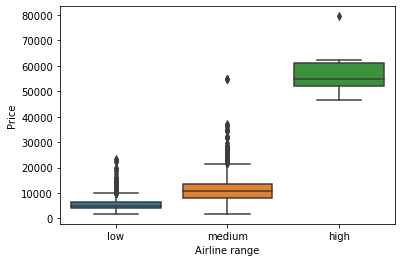

In [15]:
sns.boxplot(data = df, y ='Price', x = 'Airline range' )

### 3. ENCODING

In [16]:
#before encoding copy dataset to a new dataframe
data = df.copy()

In [17]:
# import libraries
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder() # for airlines
le2 = LabelEncoder() # for range

data["Airline"] = le1.fit_transform(data["Airline"])
data["Airline range"] = le2.fit_transform(data["Airline range"])
data = pd.get_dummies(data, columns = ['Additional Info']) # creating columns for each additional info
# Only for linear regression, we will drop 1 
keys_ = le1.classes_
values_ = le1.transform(le1.classes_)
dictionary_airlines = dict(zip(keys_, values_)) # inverse transformed values for later use

keys_ = le2.classes_
values_ = le2.transform(le2.classes_)
dictionary_AirlineRange = dict(zip(keys_, values_))   # inverse transformed values for later use

In [18]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,...,Additional Info_1 Long layover,Additional Info_1 Short layover,Additional Info_2 Long layover,Additional Info_Business class,Additional Info_Change airports,Additional Info_In-flight meal not included,Additional Info_No Info,Additional Info_No check-in baggage included,Additional Info_No info,Additional Info_Red-eye flight
0,3,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3898,...,0,0,0,0,0,0,0,0,1,0
1,1,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7663,...,0,0,0,0,0,0,0,0,1,0
2,4,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13883,...,0,0,0,0,0,0,0,0,1,0
3,3,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6219,...,0,0,0,0,0,0,0,0,1,0
4,3,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13303,...,0,0,0,0,0,0,0,0,1,0


### 4.FEATURE REDUCTION

In [19]:
# BAsed on EDA ,we can drop the following columns from the datframe
drop = ['Route']
data = data.drop(drop, axis = 1)
data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline range,Additional Info_1 Long layover,Additional Info_1 Short layover,Additional Info_2 Long layover,Additional Info_Business class,Additional Info_Change airports,Additional Info_In-flight meal not included,Additional Info_No Info,Additional Info_No check-in baggage included,Additional Info_No info,Additional Info_Red-eye flight
0,3,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3898,1,0,0,0,0,0,0,0,0,1,0
1,1,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7663,2,0,0,0,0,0,0,0,0,1,0
2,4,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13883,2,0,0,0,0,0,0,0,0,1,0
3,3,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6219,1,0,0,0,0,0,0,0,0,1,0
4,3,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13303,1,0,0,0,0,0,0,0,0,1,0


### 5.FEATURE ENGINEERING

#### DATE OF JOURNEY, DEP/ARRIVAL TIME

In [20]:
# function for month extraction 
import re # regular expression for string manipulation
def getSeason(month):
    if (month in [12, 1, 2]):
        return "winter"
    elif (month in [3, 4, 5]):
        return "summer"
    elif (month in [6, 7, 8]):
        return "monsoon"
    else:
        return "spring"

# function for period extraction 
def getPeriodOfDay(x):
    x = int(x[:2])
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Eve'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'
# function for duration counting     
def getDuration(x):
    replacements = [
    ('h', ':'),
    ('m', ''),
    (' ', '')]
    for old, new in replacements:
        x = re.sub(old, new, x) # regular expression 
    splt = x.split(':')
    hours_to_min = int(splt[0])*60
    if len(splt) == 2 and splt[1].isdigit(): # to add the remaining minutes
        fin = hours_to_min + int(splt[1])
    else:
        fin = hours_to_min
    return fin
# function for duration counting     
def getDurationHours(x):
    replacements = [
    ('h', ':'),
    ('m', ''),
    (' ', '')]
    for old, new in replacements:
        x = re.sub(old, new, x)
    splt = x.split(':')
    hours_to_min = int(splt[0])*60
    if len(splt) == 2 and splt[1].isdigit():
        min = int(splt[1])
    else:
        min =0
    return float(splt[0])+round(min/60,2)


In [21]:
data['month'] = pd.DatetimeIndex(data['Date_of_Journey']).month # month
data['day'] = pd.DatetimeIndex(data['Date_of_Journey']).day # day
data['season'] = data['month'].apply(getSeason) # season
data['Dep_Time_Period'] = data['Dep_Time'].apply(getPeriodOfDay) # period of day (departure time)
data['Arrival_Time_Period'] =data['Arrival_Time'].apply(getPeriodOfDay) # period of day (arrival time)
data['Duration_Minutes'] = data['Duration'].apply(getDuration).astype(int) # duration of a flight
data['Duration_Hours'] =data['Duration'].apply(getDurationHours) # duration of a flight in hours

In [22]:
#based on EDA adding few more features
data['weekday'] = pd.DatetimeIndex(data['Date_of_Journey']).weekday #The day of the week with Monday=0, Sunday=6.


In [23]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline range,...,Additional Info_No info,Additional Info_Red-eye flight,month,day,season,Dep_Time_Period,Arrival_Time_Period,Duration_Minutes,Duration_Hours,weekday
0,3,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3898,1,...,1,0,3,24,summer,Night,Late Night,170,2.83,6
1,1,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7663,2,...,1,0,1,5,winter,Early Morning,Noon,445,7.42,5
2,4,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13883,2,...,1,0,9,6,spring,Morning,Late Night,1140,19.00,4
3,3,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6219,1,...,1,0,12,5,winter,Eve,Night,325,5.42,3
4,3,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13303,1,...,1,0,1,3,winter,Noon,Night,285,4.75,3


#### Encode newly added features

In [24]:
df_eda = data.copy()
data["Total_Stops"] = data["Total_Stops"].map({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4})  # total stops in a period of flight 
data["season_enc"] = data["season"].map({'spring': 0, 'summer': 1, 'monsoon': 2, 'winter': 3}) # season of flight 
data["Arrival_Time_Period_enc"] = data["Arrival_Time_Period"].map({'Early Morning': 0, 'Morning': 1,
                                                                           'Noon': 2, 'Eve': 3, 'Night': 4, 'Late Night': 5}) # name of day periods 
data["Dep_Time_Period_enc"] = data["Dep_Time_Period"].map({'Early Morning': 0, 'Morning': 1,
                                                                           'Noon': 2, 'Eve': 3, 'Night': 4, 'Late Night': 5}) # name of day periods 
data['Source'] = data['Source'].map({'Delhi':1, 'Kolkata':2, 'Banglore':3, 'Mumbai':4, 'Chennai':5})
data['Destination'] = data['Destination'].map({'Cochin':1, 'Banglore':2, 'Delhi':3, 'New Delhi':4, 'Hyderabad':5, 'Kolkata':6})

#### Drop unwanted columns

In [25]:
drop = ['Date_of_Journey','Dep_Time','Arrival_Time','Duration','Dep_Time_Period', 'Arrival_Time_Period','season']
data =data.drop(drop, axis =1)
data.head()

,Airline,Source,Destination,Total_Stops,Price,Airline range,Additional Info_1 Long layover,Additional Info_1 Short layover,Additional Info_2 Long layover,Additional Info_Business class,...,Additional Info_No info,Additional Info_Red-eye flight,month,day,Duration_Minutes,Duration_Hours,weekday,season_enc,Arrival_Time_Period_enc,Dep_Time_Period_enc
0,3,3,4,0,3898,1,0,0,0,0,...,1,0,3,24,170,2.83,6,1,5,4
1,1,2,2,2,7663,2,0,0,0,0,...,1,0,1,5,445,7.42,5,3,2,0
2,4,1,1,2,13883,2,0,0,0,0,...,1,0,9,6,1140,19.00,4,0,5,1
3,3,2,2,1,6219,1,0,0,0,0,...,1,0,12,5,325,5.42,3,3,4,3
4,3,3,4,1,13303,1,0,0,0,0,...,1,0,1,3,285,4.75,3,3,4,2


In [26]:
data.groupby('Additional Info_No Info')['Price'].mean()

Additional Info_No Info
0    9088.507445
1    8045.666667
Name: Price, dtype: float64

In [27]:
drop = ['Additional Info_No Info','Additional Info_No info','Additional Info_Red-eye flight']
data = data.drop(drop,axis =1)
data.shape

(10682, 21)

In [28]:
data.dtypes

Airline                                           int32
Source                                            int64
Destination                                       int64
Total_Stops                                       int64
Price                                             int64
Airline range                                     int32
Additional Info_1 Long layover                    uint8
Additional Info_1 Short layover                   uint8
Additional Info_2 Long layover                    uint8
Additional Info_Business class                    uint8
Additional Info_Change airports                   uint8
Additional Info_In-flight meal not included       uint8
Additional Info_No check-in baggage included      uint8
month                                             int64
day                                               int64
Duration_Minutes                                  int32
Duration_Hours                                  float64
weekday                                         

### 6.STANDARDIZATION / NORMALIZATION

As per EDA 'Price', 'Duration_Minutes', 'Duration_Hours' are skewed and price has outliers. We can do Winsorsation. Winsorizing or winsorization is the transformation of statistics by limiting extreme values in the statistical data to reduce the effect of possibly spurious outliers.A typical strategy is to set all outliers to a specified percentile of the data; for example, a 90% winsorization would see all data below the 5th percentile set to the 5th percentile, and data above the 95th percentile set to the 95th percentile.

C:\Users\zacha\AppData\Local\Temp/ipykernel_16028/656670476.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data.hist(ax =ax)


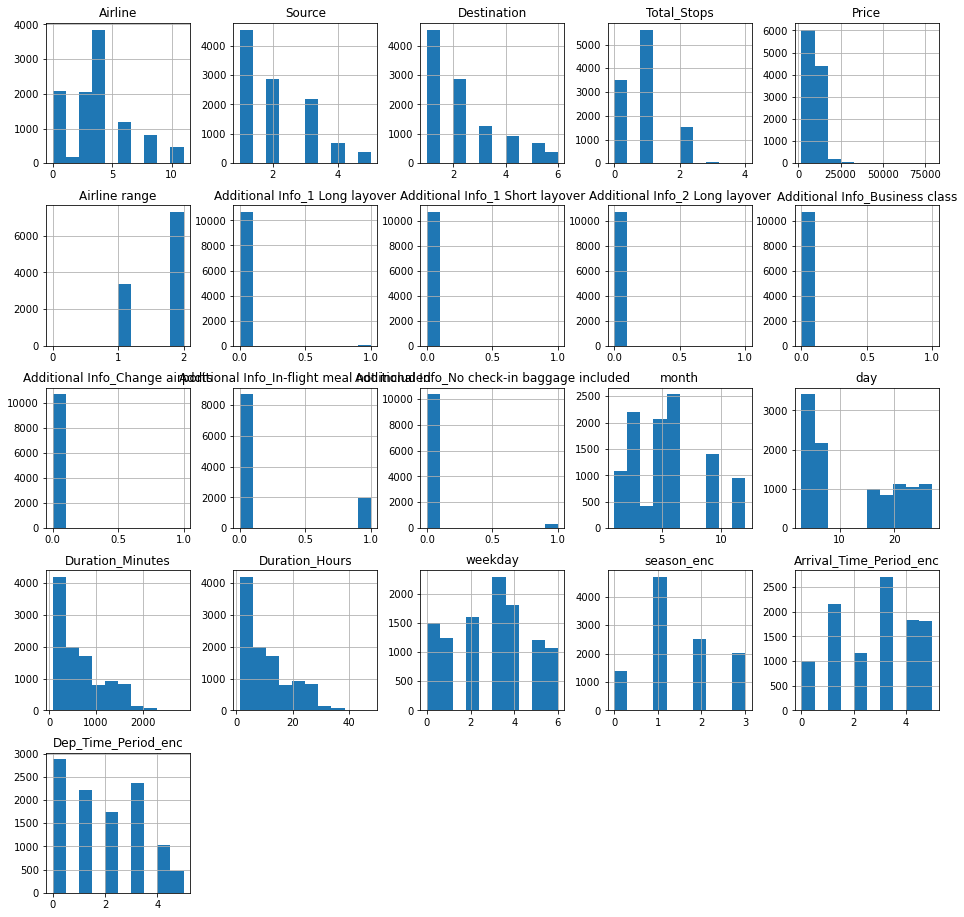

In [29]:
fig = plt.figure(figsize = (16,16))
ax = fig.gca()
data.hist(ax =ax)
plt.show()

In [30]:
from scipy.stats.mstats import winsorize
from scipy.stats import boxcox
from scipy.special import inv_boxcox
data['Price'] = winsorize(data["Price"], limits = 0.01)  #98% winsorization capping at 1 percentile and 99 percentile.
data["Price_log"], param_1 = boxcox(data["Price"]) # param_1 will be used for inverse transformation


Boxcox transformation is selected, because it will try for different values of lambda in (-5,5) and select the best value that approximates the data to a normal distribution.We dont have to manually check, by applying different transformations.https://www.statisticshowto.com/probability-and-statistics/normal-distributions/box-cox-transformation/

Text(0.5, 1.0, 'Price after Boxcox')

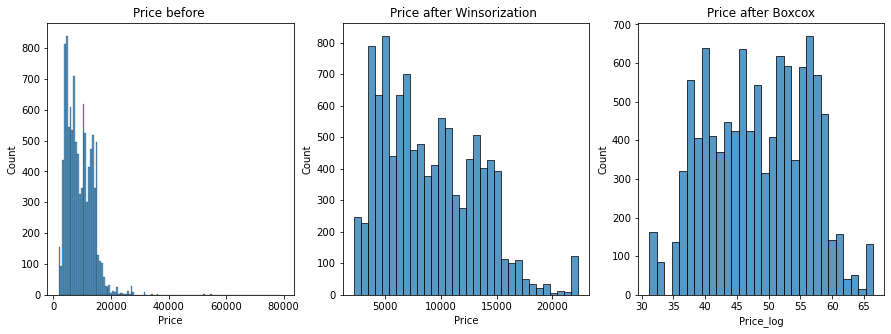

In [31]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(data = df, x = 'Price')
plt.title("Price before ")

plt.subplot(1, 3, 2)
sns.histplot(data = data, x = 'Price')
plt.title("Price after Winsorization ")

plt.subplot(1, 3, 3)
sns.histplot(data = data, x = 'Price_log')
plt.title("Price after Boxcox")

Text(0.5, 1.0, 'Duration_Minutes after Winsorization ')

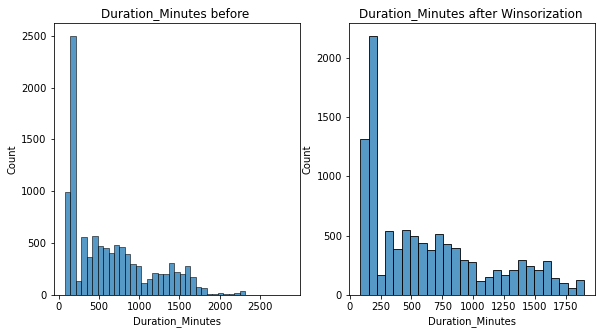

In [32]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(data = data, x = 'Duration_Minutes')
plt.title("Duration_Minutes before ")

data['Duration_Minutes'] = winsorize(data["Duration_Minutes"], limits = 0.01) 
plt.subplot(1, 3, 2)
sns.histplot(data = data, x = 'Duration_Minutes')
plt.title("Duration_Minutes after Winsorization ")

#Not transforming as it looks like bimodal normal

Text(0.5, 1.0, 'Duration_Hours after Winsorization ')

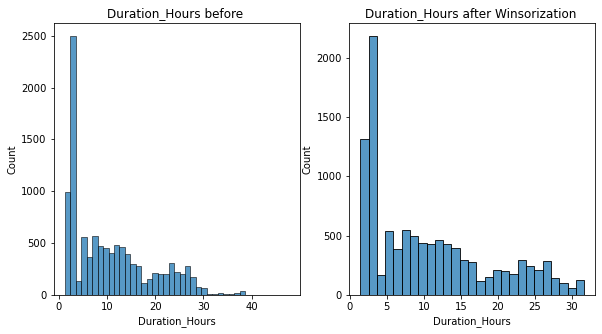

In [33]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(data = data, x = 'Duration_Hours')
plt.title("Duration_Hours before ")

data['Duration_Hours'] = winsorize(data["Duration_Hours"], limits = 0.01) 
plt.subplot(1, 3, 2)
sns.histplot(data = data, x = 'Duration_Hours')
plt.title("Duration_Hours after Winsorization ")

#Not transforming as it looks like bimodal normal

In [34]:
data.describe()

,Airline,Source,Destination,Total_Stops,Price,Airline range,Additional Info_1 Long layover,Additional Info_1 Short layover,Additional Info_2 Long layover,Additional Info_Business class,...,Additional Info_No check-in baggage included,month,day,Duration_Minutes,Duration_Hours,weekday,season_enc,Arrival_Time_Period_enc,Dep_Time_Period_enc,Price_log
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,...,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,3.966205,2.018536,2.206703,0.824190,9018.273451,1.681988,0.001779,0.000094,0.000094,0.000374,...,0.029957,5.534731,12.682925,640.234039,10.670446,2.892436,1.486145,2.715690,1.799944,48.314153
std,2.352090,1.100949,1.416846,0.675229,4235.258350,0.466930,0.042139,0.009676,0.009676,0.019348,...,0.170477,2.987626,8.803800,499.471794,8.324672,1.836124,0.945300,1.593086,1.499102,7.770762
min,0.000000,1.000000,1.000000,0.000000,2228.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,3.000000,85.000000,1.420000,0.000000,0.000000,0.000000,0.000000,31.223495
25%,3.000000,1.000000,1.000000,0.000000,5278.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.000000,5.000000,170.000000,2.830000,1.000000,1.000000,1.000000,0.000000,41.622476
50%,4.000000,2.000000,2.000000,1.000000,8373.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,5.000000,6.000000,520.000000,8.670000,3.000000,1.000000,3.000000,2.000000,48.419670
75%,4.000000,3.000000,3.000000,1.000000,12374.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,6.000000,21.000000,930.000000,15.500000,4.000000,2.000000,4.000000,3.000000,54.970988
max,11.000000,5.000000,6.000000,4.000000,22271.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,12.000000,27.000000,1900.000000,31.670000,6.000000,3.000000,5.000000,5.000000,66.425654


In [35]:
#Duration_Minutes and Duration_Hours to standardscaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data['Duration_Minutes'] = sc.fit_transform(data[['Duration_Minutes']])
data['Duration_Hours'] = sc.fit_transform(data[['Duration_Hours']])
data.head()

,Airline,Source,Destination,Total_Stops,Price,Airline range,Additional Info_1 Long layover,Additional Info_1 Short layover,Additional Info_2 Long layover,Additional Info_Business class,...,Additional Info_No check-in baggage included,month,day,Duration_Minutes,Duration_Hours,weekday,season_enc,Arrival_Time_Period_enc,Dep_Time_Period_enc,Price_log
0,3,3,4,0,3898,1,0,0,0,0,...,0,3,24,-0.941507,-0.941877,6,1,5,4,37.652117
1,1,2,2,2,7663,2,0,0,0,0,...,0,1,5,-0.390899,-0.390478,5,3,2,0,47.039109
2,4,1,1,2,13883,2,0,0,0,0,...,0,9,6,1.000636,1.000633,4,0,5,1,57.054878
3,3,2,2,1,6219,1,0,0,0,0,...,0,12,5,-0.631164,-0.630739,3,3,4,3,43.930047
4,3,3,4,1,13303,1,0,0,0,0,...,0,1,3,-0.711253,-0.711226,3,3,4,2,56.273460


## EDA

## EDA ON RAW DATA

For EDA we are using df, the original data before encoding.

<AxesSubplot:xlabel='count', ylabel='Airline'>

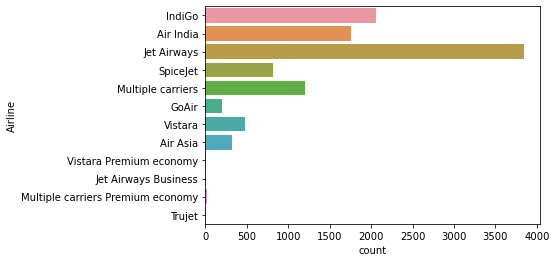

In [36]:
sns.countplot(data = df,y = 'Airline')

In [37]:
air_price = pd.DataFrame(df.groupby('Airline')['Price'].describe())
air_price.sort_values(['mean'])

,count,mean,std,min,25%,50%,75%,max
Airline,,,,,,,,
Trujet,1.0,4141.000000,NaN,4141.0,4141.0,4141.0,4141.00,4141.0
SpiceJet,818.0,4339.284841,1849.922514,1760.0,3575.5,3874.0,4761.00,23268.0
Air Asia,319.0,5591.260188,2027.362290,3384.0,4283.0,5163.0,6452.00,13775.0
IndiGo,2053.0,5674.682903,2264.142168,2228.0,4227.0,5001.0,6495.00,22154.0
GoAir,194.0,5862.056701,2703.585767,3399.0,3899.0,5136.0,6812.25,22795.0
Vistara,479.0,7797.348643,2914.298578,3688.0,5404.0,7981.0,9346.00,21731.0
Vistara Premium economy,3.0,8963.333333,2915.405518,5970.0,7548.0,9126.0,10460.00,11794.0
Air India,1751.0,9613.427756,3901.734561,2051.0,6892.0,9444.0,12220.00,31946.0
Multiple carriers,1196.0,10903.678094,3721.234997,5798.0,7724.0,10198.0,13588.00,36984.0


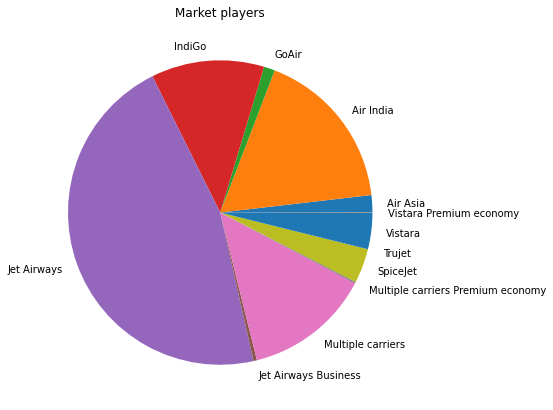

In [38]:
plt.figure(figsize =(7,7))
air_price['market_value'] = air_price['count']*air_price['mean']
air_price['market_value'].plot(kind ='pie')
plt.title('Market players')
plt.ylabel("")
plt.show()



### Univariate Analysis

<AxesSubplot:xlabel='Price', ylabel='Additional Info'>

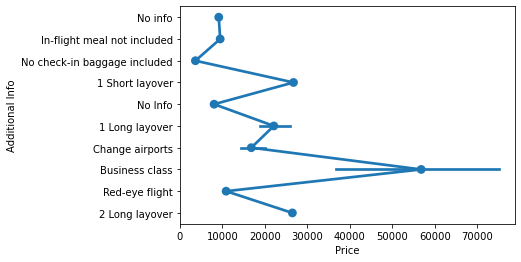

In [39]:
sns.pointplot(data =df, x = 'Price', y = 'Additional Info')

No check in bag included flights has lowest Price.Price is high for business class.

<AxesSubplot:xlabel='Source', ylabel='Price'>

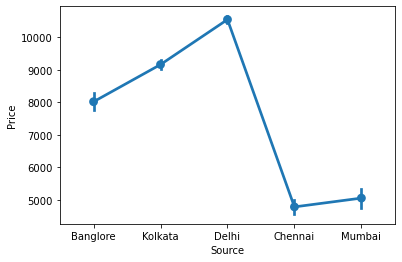

In [40]:
sns.pointplot(data =df, y = 'Price', x = 'Source')

Eventhough the plot shows variation in data, we cannot generalise this information.Price depends on distance travelled.This information is captured in total duration.

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

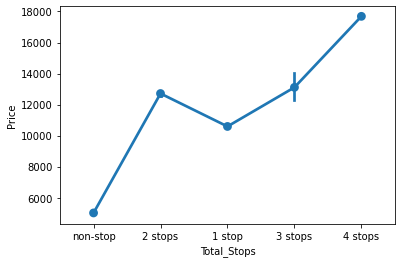

In [41]:
sns.pointplot(data =df, y = 'Price', x = 'Total_Stops')

Price is increasing with Total stops .It could be due to increase in distance.

<AxesSubplot:xlabel='Destination', ylabel='Price'>

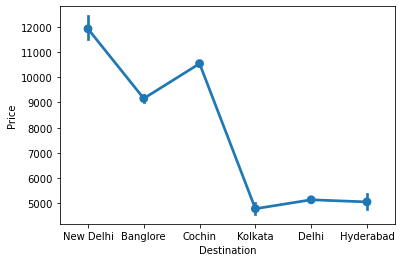

In [42]:
sns.pointplot(data =df, y = 'Price', x = 'Destination')

As in Source,eventhough the plot shows variation in data, we cannot generalise this information.Price depends on distance travelled.This information is captured in total duration.

<AxesSubplot:xlabel='Route', ylabel='Price'>

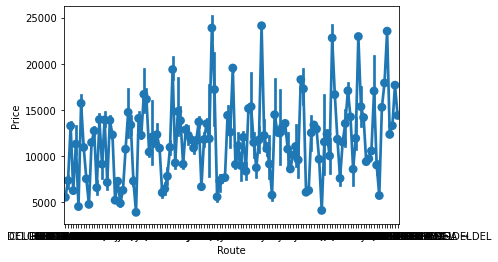

In [43]:
sns.pointplot(data =df, y = 'Price', x = 'Route') # need to get how many 

* Based on the above plots,Route is not giving any relevant information for predicting price,hence can be dropped. For furhter study a graph model may help ,but for now will drop.
* From additional info column, some useful information can be extracted, which will be done in feature engineering.
* When checking a flight, the first thing a user inputs is source and destination.Hence we will keep it.

<AxesSubplot:xlabel='Date_of_Journey', ylabel='Price'>

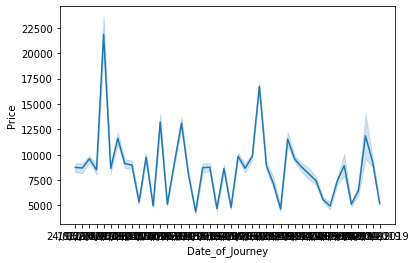

In [44]:
sns.lineplot(data = df, x ='Date_of_Journey', y = 'Price')
# date to be converted to datetime, feature extraction to be done

<AxesSubplot:xlabel='Arrival_Time', ylabel='Price'>

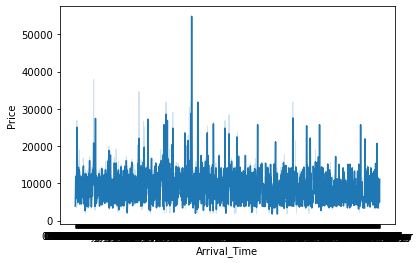

In [45]:
sns.lineplot(data = df, x ='Arrival_Time', y = 'Price')
#   feature extraction to be done

<AxesSubplot:xlabel='Dep_Time', ylabel='Price'>

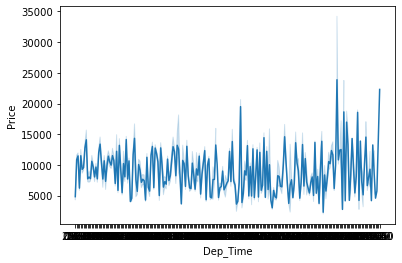

In [46]:
sns.lineplot(data = df, x ='Dep_Time', y = 'Price')
# feature extraction to be done

Date and time columns need to be changed for useful feature extraction.


## EDA ON PREPROCESSED DATA

### UNIVARIATE ANALYSIS

In [47]:
df_eda.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline range,...,Additional Info_No info,Additional Info_Red-eye flight,month,day,season,Dep_Time_Period,Arrival_Time_Period,Duration_Minutes,Duration_Hours,weekday
0,3,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3898,1,...,1,0,3,24,summer,Night,Late Night,170,2.83,6
1,1,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7663,2,...,1,0,1,5,winter,Early Morning,Noon,445,7.42,5
2,4,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13883,2,...,1,0,9,6,spring,Morning,Late Night,1140,19.00,4
3,3,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6219,1,...,1,0,12,5,winter,Eve,Night,325,5.42,3
4,3,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13303,1,...,1,0,1,3,winter,Noon,Night,285,4.75,3


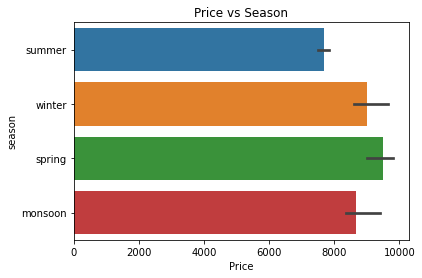

In [48]:
sns.barplot(data = df_eda, x="Price", y="season", estimator=np.median)
plt.title("Price vs Season")
plt.show()

Highest price during spring and lowest during summer.

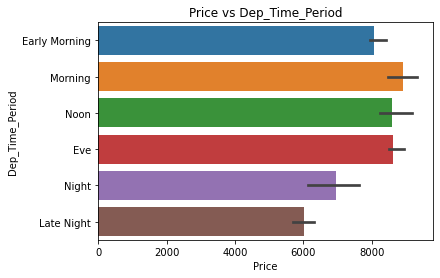

In [49]:
sns.barplot(data = df_eda, x="Price", y="Dep_Time_Period", estimator=np.median,order=["Early Morning", "Morning", "Noon", "Eve", "Night", "Late Night"])
plt.title("Price vs Dep_Time_Period")
plt.show()

Night departure flights are cheaper compared to day departue flights.

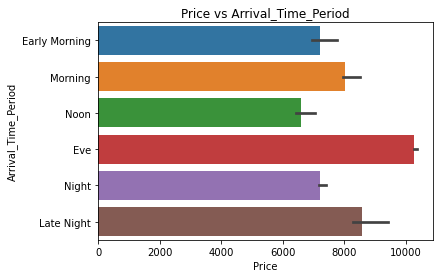

In [50]:
sns.barplot(data = df_eda, x="Price", y="Arrival_Time_Period", estimator=np.median,order=["Early Morning", "Morning", "Noon", "Eve", "Night", "Late Night"])
plt.title("Price vs Arrival_Time_Period")
plt.show()

Flight with arrival time noon is the cheapest, as it conusmes much of the productive time.

<AxesSubplot:xlabel='Duration_Hours', ylabel='Price'>

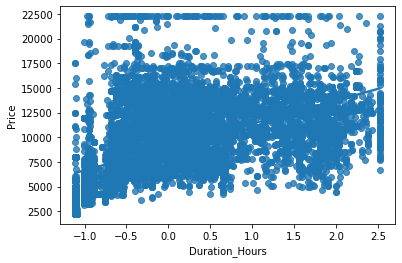

In [51]:
sns.regplot(data =data, y = 'Price', x = 'Duration_Hours')

Regression plot shows the points are scattered w.r.t regression line. We can transform the Duration Hours.Other factors are influencing price as the price is not linear w.r.t Duration_Hours.

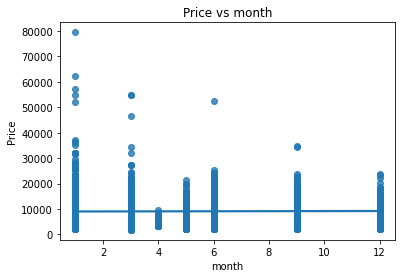

In [52]:
sns.regplot(data= df_eda, y="Price", x="month")
plt.title("Price vs month")
plt.show()

Some months have less number of flights.Could be dut to sesaonal factors or holidays. Also note that data is mssing for certain months.Month can be considered for dropping.

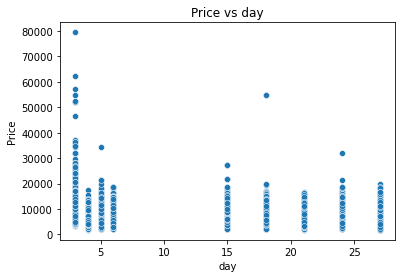

In [53]:
sns.scatterplot(data = df_eda, y="Price", x="day" )
plt.title("Price vs day")
plt.show()

Data is available for only few dates. A generalised feature (weekday/weekend etc) can be extracted from day as a better predictor variable.

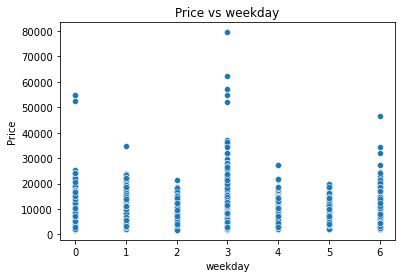

In [54]:
sns.scatterplot(data = df_eda, y="Price", x="weekday" ) #The day of the week with Monday=0, Sunday=6.
plt.title("Price vs weekday") 
plt.show()

Wednesday and Friday has low price.

C:\Users\zacha\AppData\Local\Temp/ipykernel_16028/2966025130.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_eda[['Price', 'Duration_Minutes', 'Duration_Hours']].hist(ax = ax)


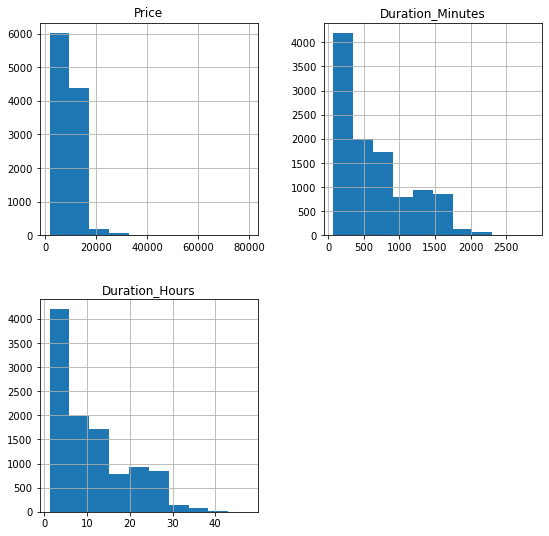

In [55]:
fig = plt.figure(figsize = (9,9))
ax = fig.gca()
df_eda[['Price', 'Duration_Minutes', 'Duration_Hours']].hist(ax = ax)
plt.show()

<AxesSubplot:>

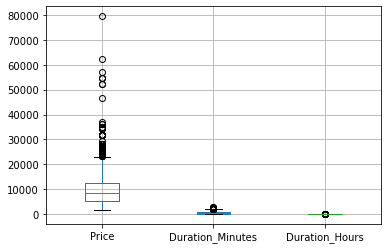

In [56]:
df_eda[['Price', 'Duration_Minutes', 'Duration_Hours']].boxplot()

'Price', 'Duration_Minutes' and 'Duration_Hours' are highly skewed and has outliers. We have to consider this while transforming the variables.

### BIVARIATE ANALYSIS

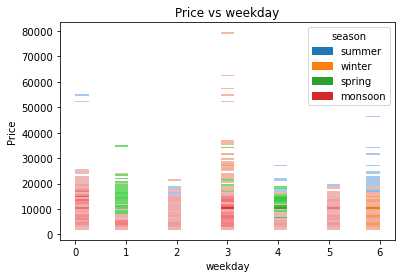

In [57]:
sns.histplot(data = df_eda, y="Price", x="weekday", hue = 'season' ) #The day of the week with Monday=0, Sunday=6.
plt.title("Price vs weekday") 
plt.show()

Monsoon/Winter flights are available more frequently as per this data. Only very few flights are running in spring and summer.Could be due to holiday season.

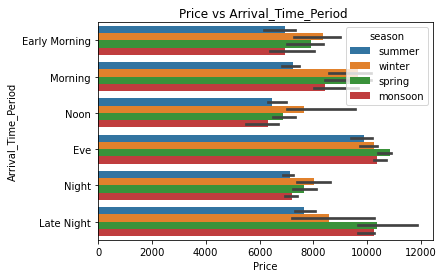

In [58]:
sns.barplot(data = df_eda, x="Price", y="Arrival_Time_Period", estimator=np.median,hue = 'season',order=["Early Morning", "Morning", "Noon", "Eve", "Night", "Late Night"])
plt.title("Price vs Arrival_Time_Period ")
plt.show()

In [59]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Airline range', 'Additional Info_1 Long layover',
       'Additional Info_1 Short layover', 'Additional Info_2 Long layover',
       'Additional Info_Business class', 'Additional Info_Change airports',
       'Additional Info_In-flight meal not included',
       'Additional Info_No check-in baggage included', 'month', 'day',
       'Duration_Minutes', 'Duration_Hours', 'weekday', 'season_enc',
       'Arrival_Time_Period_enc', 'Dep_Time_Period_enc', 'Price_log'],
      dtype='object')

There is variation in time prference w.r.t season.

## MODELLING

In [60]:
#TARGET AND PREDICTOR VARIABLES
X = data.drop(['Price', 'Price_log'],axis =1)
y = data['Price_log']

### CORELATION ANALYSIS

In [61]:
data.corr()["Price"].abs().sort_values(ascending=False)

Price                                           1.000000
Price_log                                       0.983705
Total_Stops                                     0.649208
Airline range                                   0.578800
Duration_Hours                                  0.556436
Duration_Minutes                                0.556433
Source                                          0.399563
Destination                                     0.345796
Additional Info_No check-in baggage included    0.221645
day                                             0.164658
Additional Info_1 Long layover                  0.095959
Additional Info_Business class                  0.060566
Arrival_Time_Period_enc                         0.059849
Dep_Time_Period_enc                             0.054266
Additional Info_In-flight meal not included     0.051305
season_enc                                      0.045722
Airline                                         0.044038
Additional Info_Change airports

In [62]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Airline range', 'Additional Info_1 Long layover',
       'Additional Info_1 Short layover', 'Additional Info_2 Long layover',
       'Additional Info_Business class', 'Additional Info_Change airports',
       'Additional Info_In-flight meal not included',
       'Additional Info_No check-in baggage included', 'month', 'day',
       'Duration_Minutes', 'Duration_Hours', 'weekday', 'season_enc',
       'Arrival_Time_Period_enc', 'Dep_Time_Period_enc', 'Price_log'],
      dtype='object')

<AxesSubplot:>

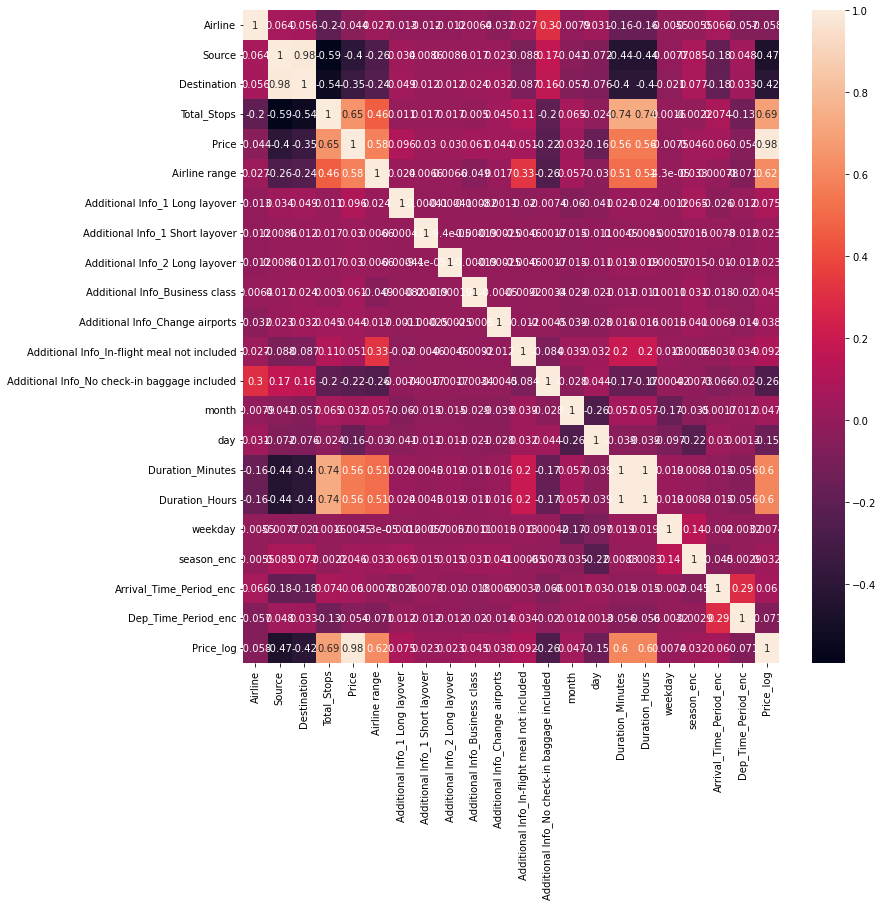

In [63]:
corr = data.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr, annot =True)

### LINEAR REGRESSION

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [65]:
# selected features based on corelation heatmap.
select = [ 'Total_Stops', 'Airline range', 'Duration_Hours',
        'Additional Info_No check-in baggage included','Additional Info_In-flight meal not included',
       'day', 'Additional Info_1 Long layover',
       'Additional Info_Business class']

X_sel = X[select]
X_train, X_test, y_train, y_test = train_test_split(X_sel,y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

test_inv = inv_boxcox(y_test, param_1) # inverse value for evaluation
pred_inv = inv_boxcox(y_pred, param_1)

print("Root Mean squared error is  ", mean_squared_error(test_inv, pred_inv, squared = False))
print("R2 score ", lr_model.score(X_test,y_test))

Root Mean squared error is   2939.291342004721
R2 score  0.6257116789850313


### RANDOM FOREST REGRESSOR

In [66]:
#RF can be fed with whole features.It will iteratively identify the best features.
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42) 

rf_model = rf.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

test_inv = inv_boxcox(y_test, param_1) # inverse value for evaluation
pred_inv = inv_boxcox(y_pred, param_1)

print("Root Mean squared error is  ", mean_squared_error(test_inv, pred_inv, squared = False))
print("R2 score ", rf_model.score(X_test,y_test))

Root Mean squared error is   1316.807551048314
R2 score  0.9260059248116083


In [67]:
pd.Series(rf.feature_importances_,index = X_train.columns).sort_values()

Additional Info_Business class                  0.000016
Additional Info_2 Long layover                  0.000045
Additional Info_1 Short layover                 0.000063
Additional Info_No check-in baggage included    0.000084
Additional Info_Change airports                 0.000089
Additional Info_1 Long layover                  0.000103
season_enc                                      0.007439
Source                                          0.008749
Destination                                     0.010478
weekday                                         0.013315
Dep_Time_Period_enc                             0.013645
Total_Stops                                     0.014708
Arrival_Time_Period_enc                         0.016660
month                                           0.024626
Additional Info_In-flight meal not included     0.033823
Airline                                         0.055481
Airline range                                   0.088647
day                            

Random Forest regressor has better performance compared to linear regression.As per the feature importance list , Duration Hours is an important feature deciding price. 

### CATBOOST REGRESSOR

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

In [69]:
#pip install catboost
import catboost as cb
model = cb.CatBoostRegressor(loss_function='RMSE')

In order to train and optimize our model, we need to utilize CatBoost library integrated tool for combining features and target variables into a train and test dataset. This pooling allows you to pinpoint target variables, predictors, and the list of categorical features, while the pool constructor will combine those inputs and pass them to the model.

In [70]:
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)


In [71]:
model.fit(train_dataset)
y_pred = model.predict(X_test)

test_inv = inv_boxcox(y_test, param_1) # inverse value for evaluation
pred_inv = inv_boxcox(y_pred, param_1)



Learning rate set to 0.057463
0:	learn: 7.4359415	total: 139ms	remaining: 2m 18s
1:	learn: 7.1512634	total: 142ms	remaining: 1m 10s
2:	learn: 6.8765029	total: 146ms	remaining: 48.4s
3:	learn: 6.6315888	total: 148ms	remaining: 36.9s
4:	learn: 6.3945144	total: 151ms	remaining: 30.1s
5:	learn: 6.1701586	total: 154ms	remaining: 25.5s
6:	learn: 5.9653479	total: 156ms	remaining: 22.2s
7:	learn: 5.7629717	total: 159ms	remaining: 19.7s
8:	learn: 5.5873500	total: 162ms	remaining: 17.8s
9:	learn: 5.4248119	total: 164ms	remaining: 16.3s
10:	learn: 5.2775350	total: 167ms	remaining: 15s
11:	learn: 5.1450440	total: 170ms	remaining: 14s
12:	learn: 5.0153970	total: 172ms	remaining: 13.1s
13:	learn: 4.8895259	total: 176ms	remaining: 12.4s
14:	learn: 4.7487815	total: 179ms	remaining: 11.8s
15:	learn: 4.6137431	total: 182ms	remaining: 11.2s
16:	learn: 4.5053561	total: 184ms	remaining: 10.7s
17:	learn: 4.4150828	total: 187ms	remaining: 10.2s
18:	learn: 4.3071801	total: 190ms	remaining: 9.78s
19:	learn: 4.

189:	learn: 2.5314142	total: 696ms	remaining: 2.97s
190:	learn: 2.5302671	total: 699ms	remaining: 2.96s
191:	learn: 2.5273724	total: 703ms	remaining: 2.96s
192:	learn: 2.5252400	total: 707ms	remaining: 2.96s
193:	learn: 2.5242928	total: 711ms	remaining: 2.95s
194:	learn: 2.5206818	total: 714ms	remaining: 2.95s
195:	learn: 2.5182007	total: 717ms	remaining: 2.94s
196:	learn: 2.5174887	total: 719ms	remaining: 2.93s
197:	learn: 2.5166675	total: 722ms	remaining: 2.92s
198:	learn: 2.5156989	total: 725ms	remaining: 2.92s
199:	learn: 2.5145224	total: 727ms	remaining: 2.91s
200:	learn: 2.5138895	total: 730ms	remaining: 2.9s
201:	learn: 2.5128612	total: 732ms	remaining: 2.89s
202:	learn: 2.5106520	total: 735ms	remaining: 2.88s
203:	learn: 2.5100518	total: 738ms	remaining: 2.88s
204:	learn: 2.5071611	total: 740ms	remaining: 2.87s
205:	learn: 2.5066492	total: 743ms	remaining: 2.86s
206:	learn: 2.5058253	total: 745ms	remaining: 2.85s
207:	learn: 2.5049020	total: 748ms	remaining: 2.85s
208:	learn: 2

362:	learn: 2.2869178	total: 1.21s	remaining: 2.12s
363:	learn: 2.2863679	total: 1.21s	remaining: 2.12s
364:	learn: 2.2858300	total: 1.21s	remaining: 2.11s
365:	learn: 2.2847333	total: 1.22s	remaining: 2.11s
366:	learn: 2.2833619	total: 1.22s	remaining: 2.1s
367:	learn: 2.2829393	total: 1.22s	remaining: 2.1s
368:	learn: 2.2815431	total: 1.23s	remaining: 2.1s
369:	learn: 2.2793952	total: 1.23s	remaining: 2.09s
370:	learn: 2.2785835	total: 1.23s	remaining: 2.09s
371:	learn: 2.2769478	total: 1.23s	remaining: 2.08s
372:	learn: 2.2755760	total: 1.24s	remaining: 2.08s
373:	learn: 2.2748085	total: 1.24s	remaining: 2.07s
374:	learn: 2.2738335	total: 1.24s	remaining: 2.07s
375:	learn: 2.2724875	total: 1.24s	remaining: 2.06s
376:	learn: 2.2711499	total: 1.25s	remaining: 2.06s
377:	learn: 2.2694954	total: 1.25s	remaining: 2.06s
378:	learn: 2.2682462	total: 1.25s	remaining: 2.05s
379:	learn: 2.2672663	total: 1.25s	remaining: 2.05s
380:	learn: 2.2659206	total: 1.26s	remaining: 2.04s
381:	learn: 2.2

545:	learn: 2.1083945	total: 2.08s	remaining: 1.73s
546:	learn: 2.1078308	total: 2.08s	remaining: 1.73s
547:	learn: 2.1071071	total: 2.09s	remaining: 1.72s
548:	learn: 2.1055352	total: 2.09s	remaining: 1.72s
549:	learn: 2.1049121	total: 2.09s	remaining: 1.71s
550:	learn: 2.1041821	total: 2.1s	remaining: 1.71s
551:	learn: 2.1034645	total: 2.1s	remaining: 1.71s
552:	learn: 2.1027314	total: 2.11s	remaining: 1.7s
553:	learn: 2.1017325	total: 2.11s	remaining: 1.7s
554:	learn: 2.1013037	total: 2.12s	remaining: 1.7s
555:	learn: 2.1006472	total: 2.12s	remaining: 1.69s
556:	learn: 2.1002898	total: 2.12s	remaining: 1.69s
557:	learn: 2.0999725	total: 2.13s	remaining: 1.69s
558:	learn: 2.0990090	total: 2.13s	remaining: 1.68s
559:	learn: 2.0984119	total: 2.13s	remaining: 1.68s
560:	learn: 2.0972440	total: 2.14s	remaining: 1.67s
561:	learn: 2.0966701	total: 2.14s	remaining: 1.67s
562:	learn: 2.0956103	total: 2.15s	remaining: 1.67s
563:	learn: 2.0952448	total: 2.15s	remaining: 1.66s
564:	learn: 2.094

731:	learn: 1.9856803	total: 2.77s	remaining: 1.01s
732:	learn: 1.9850530	total: 2.78s	remaining: 1.01s
733:	learn: 1.9847038	total: 2.78s	remaining: 1.01s
734:	learn: 1.9840342	total: 2.78s	remaining: 1s
735:	learn: 1.9834571	total: 2.79s	remaining: 1000ms
736:	learn: 1.9826755	total: 2.79s	remaining: 997ms
737:	learn: 1.9825465	total: 2.79s	remaining: 993ms
738:	learn: 1.9819246	total: 2.8s	remaining: 989ms
739:	learn: 1.9810192	total: 2.81s	remaining: 986ms
740:	learn: 1.9806414	total: 2.81s	remaining: 983ms
741:	learn: 1.9805237	total: 2.82s	remaining: 981ms
742:	learn: 1.9800000	total: 2.83s	remaining: 978ms
743:	learn: 1.9791798	total: 2.83s	remaining: 974ms
744:	learn: 1.9789140	total: 2.84s	remaining: 972ms
745:	learn: 1.9778013	total: 2.85s	remaining: 969ms
746:	learn: 1.9770084	total: 2.85s	remaining: 967ms
747:	learn: 1.9762068	total: 2.86s	remaining: 964ms
748:	learn: 1.9759656	total: 2.87s	remaining: 961ms
749:	learn: 1.9751851	total: 2.89s	remaining: 963ms
750:	learn: 1.9

892:	learn: 1.8917689	total: 3.66s	remaining: 438ms
893:	learn: 1.8912181	total: 3.66s	remaining: 434ms
894:	learn: 1.8908538	total: 3.67s	remaining: 430ms
895:	learn: 1.8900396	total: 3.67s	remaining: 426ms
896:	learn: 1.8893563	total: 3.67s	remaining: 422ms
897:	learn: 1.8888392	total: 3.68s	remaining: 418ms
898:	learn: 1.8881432	total: 3.68s	remaining: 413ms
899:	learn: 1.8866463	total: 3.68s	remaining: 409ms
900:	learn: 1.8860739	total: 3.69s	remaining: 405ms
901:	learn: 1.8854813	total: 3.69s	remaining: 401ms
902:	learn: 1.8852014	total: 3.7s	remaining: 397ms
903:	learn: 1.8844102	total: 3.7s	remaining: 393ms
904:	learn: 1.8838987	total: 3.7s	remaining: 389ms
905:	learn: 1.8835892	total: 3.71s	remaining: 385ms
906:	learn: 1.8826267	total: 3.71s	remaining: 380ms
907:	learn: 1.8818820	total: 3.71s	remaining: 376ms
908:	learn: 1.8816437	total: 3.72s	remaining: 372ms
909:	learn: 1.8808572	total: 3.72s	remaining: 368ms
910:	learn: 1.8806718	total: 3.72s	remaining: 364ms
911:	learn: 1.8

In [72]:
print("Root Mean squared error is  ", mean_squared_error(test_inv, pred_inv, squared = False))
print("R2 score ", model.score(X_test,y_test))

Root Mean squared error is   1251.7228849552123
R2 score  0.9323834432936753


In [73]:
pd.Series(model.feature_importances_,index = X_train.columns).sort_values()

Additional Info_1 Short layover                  0.000000
Additional Info_Business class                   0.000047
Additional Info_2 Long layover                   0.002028
Additional Info_Change airports                  0.006062
Additional Info_1 Long layover                   0.007402
Additional Info_No check-in baggage included     0.023168
season_enc                                       0.738039
Source                                           1.672424
Dep_Time_Period_enc                              1.959046
weekday                                          2.229592
Arrival_Time_Period_enc                          2.281484
Destination                                      3.349348
month                                            4.042396
Total_Stops                                      6.761139
Additional Info_In-flight meal not included      6.793797
Duration_Hours                                  10.338913
Duration_Minutes                                11.920214
day           

Catboost regressor has identified Airline, Duration_Hours and Day as top predictors. Catboost has the better score so far.

### GRADIENT BOOST REGRESSOR

In [74]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb = gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

test_inv = inv_boxcox(y_test, param_1) # inverse value for evaluation
pred_inv = inv_boxcox(y_pred, param_1)

print("Root Mean squared error is  ", mean_squared_error(test_inv, pred_inv, squared = False))
print("R2 score ", rf_model.score(X_test,y_test))

Root Mean squared error is   1654.5162870712252
R2 score  0.9770551733301607


## HYPER PARAMETER TUNING

In [75]:
# Try to improve gradienst boost regressor with hyper parameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {'learning_rate': [0.01, 0.05, 0.1, 0.2],
             'max_depth': [4, 5, 6], 'n_estimators': [100, 200, 300]}

grid = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=2).fit(X_train, y_train)

In [76]:
grid.best_params_

{'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 200}

In [77]:
# train GradientBoostingRegressor with selected params
gb_ht = GradientBoostingRegressor(learning_rate = .1, max_depth =6, n_estimators = 300)
gb_ht = gb_ht.fit(X_train,y_train)
y_pred = gb_ht.predict(X_test)
test_inv = inv_boxcox(y_test, param_1) # inverse value for evaluation
pred_inv = inv_boxcox(y_pred, param_1)

print("Root Mean squared error is  ", mean_squared_error(test_inv, pred_inv, squared = False))
print("R2 score ", rf_model.score(X_test,y_test))

Root Mean squared error is   1168.9259341585546
R2 score  0.9770551733301607


In [78]:
pd.Series(gb_ht.feature_importances_,index = X_train.columns).sort_values()

Additional Info_1 Short layover                 0.000000
Additional Info_No check-in baggage included    0.000052
Additional Info_2 Long layover                  0.000068
Additional Info_1 Long layover                  0.000077
Additional Info_Change airports                 0.000110
Additional Info_Business class                  0.000118
season_enc                                      0.005346
Source                                          0.007896
Dep_Time_Period_enc                             0.009268
weekday                                         0.011054
Destination                                     0.011651
Arrival_Time_Period_enc                         0.011801
Total_Stops                                     0.016793
month                                           0.022730
Additional Info_In-flight meal not included     0.025018
Airline                                         0.076500
day                                             0.087761
Airline range                  

In [79]:
import joblib
joblib.dump(gb_ht, 'gbht.sav')

['gbht.sav']

In [80]:
X_train.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Airline range',
       'Additional Info_1 Long layover', 'Additional Info_1 Short layover',
       'Additional Info_2 Long layover', 'Additional Info_Business class',
       'Additional Info_Change airports',
       'Additional Info_In-flight meal not included',
       'Additional Info_No check-in baggage included', 'month', 'day',
       'Duration_Minutes', 'Duration_Hours', 'weekday', 'season_enc',
       'Arrival_Time_Period_enc', 'Dep_Time_Period_enc'],
      dtype='object')

## CONCLUSION

GradientBoostingRegressor with tuned hyperparameters gave better results. Final model is saved in gbht.sav file.


## REFERENCES

https://www.kaggle.com/code/lizakonopelko/airline-fare-eda-boosting-prediction#Modeling:-Linear-Regression-+-Boosting
https://towardsdatascience.com/catboost-regression-in-6-minutes-3487f3e5b329    
https://www.statisticshowto.com/probability-and-statistics/normal-distributions/box-cox-transformation/